In [239]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [240]:
df1=pd.read_csv('autre_mois.csv')

In [241]:
df2=pd.read_csv('bureau_admin_enseignement_mois.csv')
df3=pd.read_csv('centre_commercial_mois.csv')
df4=pd.read_csv('occupation_continue_mois.csv')

In [322]:
X1_title='predictions pour la catégorie Autres par mois'
X2_title='predictions pour la catégorie bureau_admin_enseignement par mois'
X3_title='predictions pour la catégorie centre_commercial par mois'
X4_title='predictions pour la catégorie occupation_continue par mois'
titles=[X1_title,X2_title,X3_title,X4_title]

In [242]:
X1=np.array(df1['estimation_ges'].tolist())
X2=np.array(df2['estimation_ges'].tolist())
X3=np.array(df3['estimation_ges'].tolist())
X4=np.array(df4['estimation_ges'].tolist())

In [244]:
path='data/stocks/A.csv'
df_train=pd.read_csv(path)
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300
1,1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600
4,1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200


In [278]:
X=np.array(df_train['Open'].tolist())

In [279]:
def split(X,n_seq=5):
    X_train=[X[i:i+n_seq] for i in range (len(X)-n_seq)]
    y_train=[X[i+n_seq] for i in range(len(X)-n_seq)]
    return np.array(X_train),np.array(y_train) 

In [280]:
def preprocess(X,n_seq=5):
    X_train,y_train=split(X,n_seq=n_seq)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  
    return X_train,y_train


In [281]:
X_train,y_train=preprocess(X,n_seq=5)

In [282]:
n=int(0.85*len(X))
X_train,X_val=X_train[:n],X_train[n:]
y_train,y_val=y_train[:n],y_train[n:]

In [283]:
# Définition du modèle LSTM
model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train.shape[1], 1),return_sequences=False),

    Dense(1)  # Une seule sortie
])

# Compilation du modèle
model.compile(optimizer='adam', loss='mse')

# Afficher le résumé du modèle
model.summary()
# Entraînement du modèle
model.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=40, batch_size=8, verbose=1)

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
545/545 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 41.4446 - val_loss: 3.0588
Epoch 2/40
545/545 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.2409 - val_loss: 1.7574
Epoch 3/40
545/545 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9281 - val_loss: 28.6819
Epoch 4/40
545/545 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2033 - val_loss: 8.0444
Epoch 5/40
545/545 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.8100 - val_loss: 1.5673
Epoch 6/40
545/545 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.5319 - val_loss: 8.6813
Epoch 7/40
545/545 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.8079 - val_loss: 1.4197
Epoch 8/40
545/545 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.6699 - val_loss: 2.9404
Epoch 9/40
545/545 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.9125 - val_loss: 1.8328
Epoch 10/40
545/545 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.3830 - val_loss: 8.0647
Epoch 11/40
545/545 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.4394 - val_loss: 2.3536
Epoch 12/40
545/545 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/st

In [334]:
def predict(X,i,y):
    prediction = model.predict(X)
    idx=np.arange(len(y))
    plt.plot(idx,y)
    plt.plot(idx,prediction)
    mean_squared_error(y,prediction)
    plt.legend(['true','predicted'])
    plt.title(titles[i-1])

In [335]:
X1_topredict,y1_true=preprocess(X1,n_seq=5)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


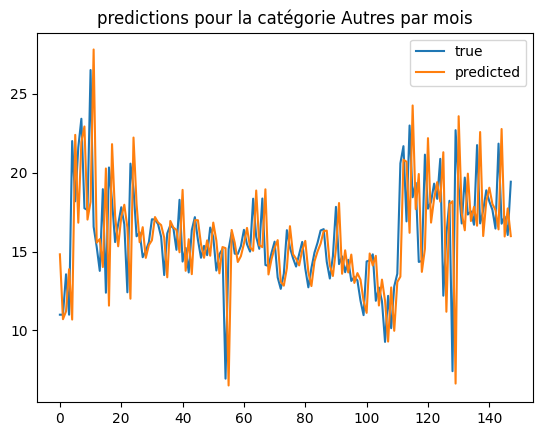

In [336]:
predict(X1_topredict,1,y1_true)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


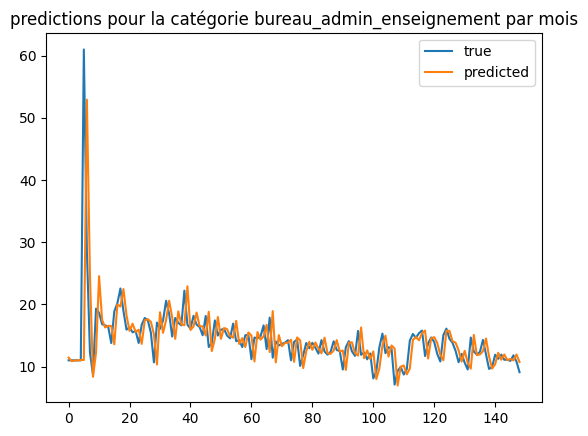

In [337]:
X2_topredict,y2_true=preprocess(X2,n_seq=5)
predict(X2_topredict,2,y2_true)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


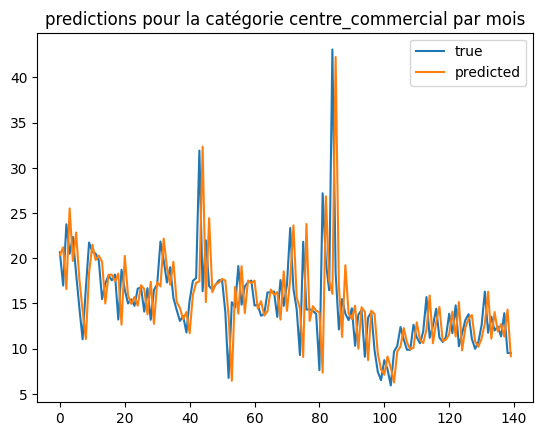

In [338]:
X3_topredict,y3_true=preprocess(X3,n_seq=5)
predict(X3_topredict,3,y3_true)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


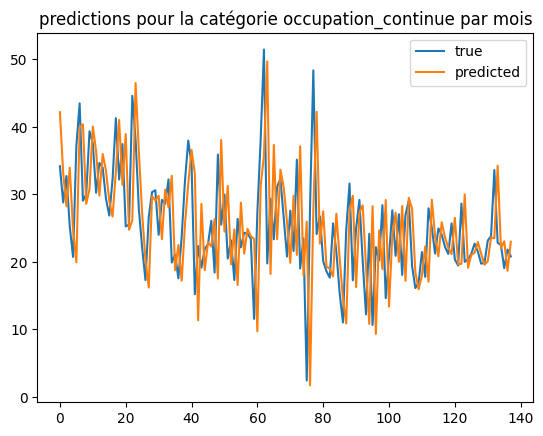

In [339]:
X4_topredict,y4_true=preprocess(X4,n_seq=5)
predict(X4_topredict,4,y4_true)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

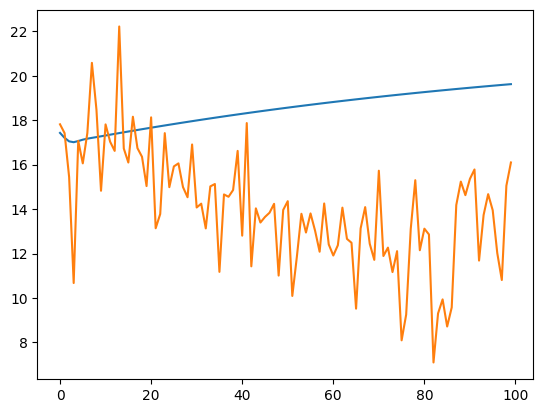

In [289]:
def recursive_forecast( X,n, future_days=30):
    predicted_values = []
    last_sequence=X[n].reshape(1,X.shape[1],1)
    true_values=[X[i,-1] for i in range(n+1,n+1+future_days)]

    for _ in range(future_days):
        next_pred = model.predict(last_sequence)[0][0]
      # Prédiction du jour suivant
        predicted_values.append(next_pred)

        # Ajouter la prédiction dans la séquence et enlever l'ancienne valeur
        last_sequence = np.append(last_sequence[:, 1:, :], [[[next_pred]]], axis=1)

    future_preds=np.array(predicted_values).reshape(-1, 1)
    future_preds=future_preds.reshape(len(future_preds))
    idx=np.arange(len(future_preds))
    plt.plot(idx,future_preds)
    plt.plot(idx,true_values)


future_predictions = recursive_forecast( X2_topredict,25, future_days=100)
